# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [3]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [13]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [14]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [15]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


**Done**

### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [16]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [17]:
N_Train = 4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [44]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

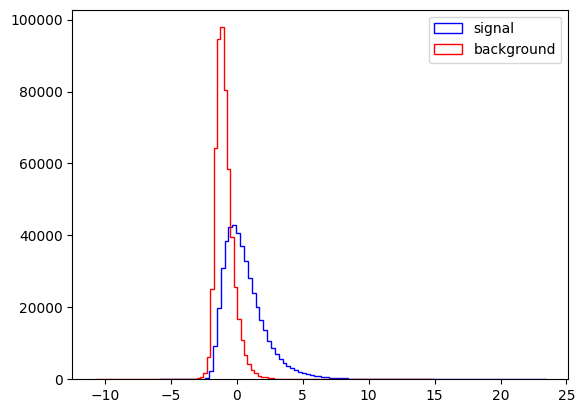

In [19]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

In [20]:
from sklearn.metrics import roc_curve, auc


In [21]:
# This will Probability estimates for both training and test samples

probas_train = Fisher.predict_proba(X_Train)[:, 1]
probas_test = Fisher.predict_proba(X_Test)[:, 1]

# .ROC curve and .AUC for _training_ sample
fpr_train, tpr_train, _ = roc_curve(y_Train, probas_train)
roc_auc_train = auc(fpr_train, tpr_train)

# .ROC curve and .AUC for _test_ sample
fpr_test, tpr_test, _ = roc_curve(y_Test, probas_test)
roc_auc_test = auc(fpr_test, tpr_test)


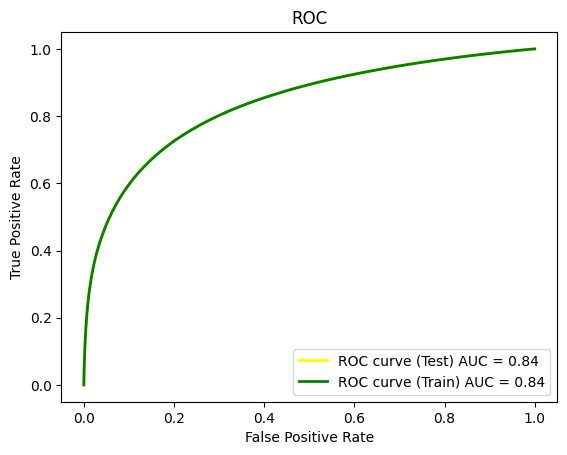

In [22]:
# Plotting

plt.figure()
plt.plot(fpr_test, tpr_test, color='yellow', lw=2, label='ROC curve (Test) AUC = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='green', lw=2, label='ROC curve (Train) AUC = %0.2f' % roc_auc_train)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()



No, I dont see any bias. (The curves re overlapped)

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [23]:
input_configs = {
    "Raw Features": VarNames[1:],
    "Features": ["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"],
    "Raw + Features": VarNames[1:] + ["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
}


In [24]:

Fisher = DA.LinearDiscriminantAnalysis()


In [25]:
# Initializing lists to store ROC curve data and AUC values for each input configuration

roc_data = {}
auc_values = {}


In [26]:

# Iterating over input configurations to do at once

for config_name, config_vars in input_configs.items():
    
    #input variables based on the configuration
    X_Train_config = Train_Sample[config_vars]
    X_Test_config = Test_Sample[config_vars]
    
    # ttraining the classifier
    Fisher.fit(X_Train_config, y_Train)
    
    #  probability estimates for test samples
    probas_test = Fisher.predict_proba(X_Test_config)[:, 1]
    
    # ROC curve and AUC for test sample
    fpr, tpr, _ = roc_curve(y_Test, probas_test)
    roc_auc = auc(fpr, tpr)
    
    # ROC curve data and AUC value
    roc_data[config_name] = (fpr, tpr)
    auc_values[config_name] = roc_auc




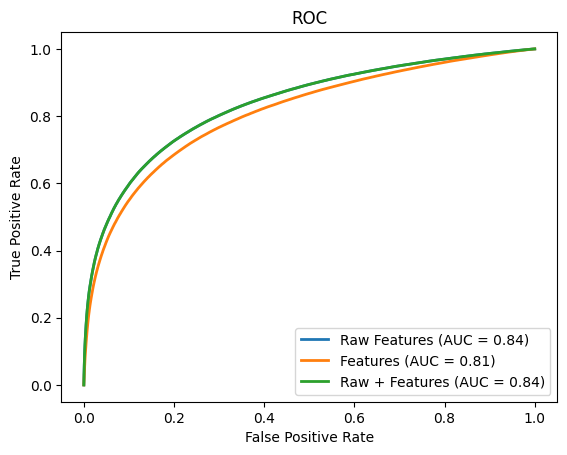

In [27]:
# Plotting all input configurations using for loop

plt.figure()
for config_name, (fpr, tpr) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (config_name, auc_values[config_name]))
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

No Bias between the "Raw + Features" and the raw features, and they are overlapped.

In general, a higher ROC curve, along with a higher AUC value, indicates better performance for a classifier.

Both the Raw + Features and Raw ROC have the same ROC value of 0.84, which indicates that they have similar performance. The Features ROC has a slightly lower value of 0.81, indicating slightly worse performance compared to the other two.


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part b to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

### Part A

1. Random Forest Classifier
2. Support Vector Machine (SVM)
3. Gradient Boosting

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Part B

In [29]:
from sklearn.metrics import roc_auc_score


In [30]:
def compare_classifiers(classifiers, X_train, y_train, X_test, y_test):
    """
    Notes:
   
    """
    
    plt.figure(figsize=(8, 6))
    auc_scores = {}

    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        if hasattr(clf, "decision_function"):
            y_test_scores = clf.decision_function(X_test)
        else:
            y_test_scores = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        auc_score = roc_auc_score(y_test, y_test_scores)
        auc_scores[clf_name] = auc_score
        plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {auc_score:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [31]:
# Instantiating all the classifiers

nb_classifier = GaussianNB()
logit_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier()

In [32]:
classifiers = {'Naive Bayes': nb_classifier, 'Logistic Classifier': logit_classifier, 'K Nearest Neighbors (KNN)': knn_classifier}


In [33]:
# Note: Didnt specify any parameters for the classifiers

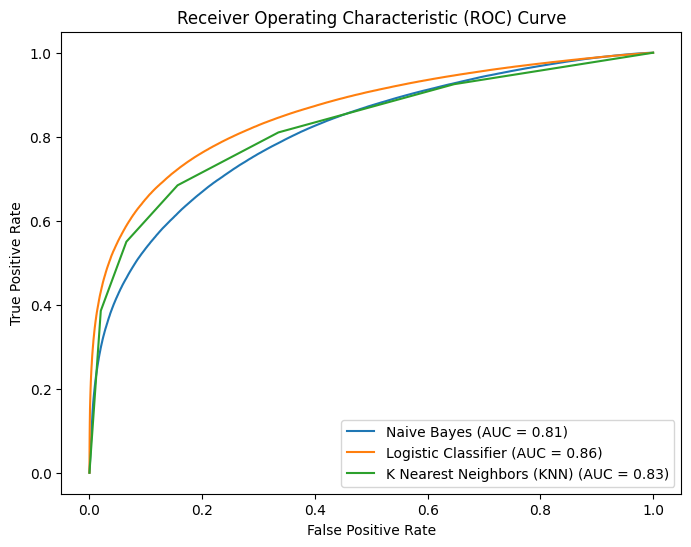

In [34]:
compare_classifiers(classifiers, X_Train, y_Train, X_Test, y_Test)


Logistic Classifier (Reg) performed best.

#### Part C

In [35]:
optimal_threshold = 0.5  

# Assuming threshold of 0.5 for demonstration purposes


In [36]:

# function for maximal significance

def maximal_significance(y_true, y_pred, threshold):
    tp = np.sum((y_pred >= threshold) & (y_true == 1))
    fp = np.sum((y_pred >= threshold) & (y_true == 0))
    tn = np.sum((y_pred < threshold) & (y_true == 0))
    fn = np.sum((y_pred < threshold) & (y_true == 1))

    signal = tp / np.sqrt(tp + fp)
    background = fp / np.sqrt(fp + tn)
    
    significance = signal + background
    return significance

In [39]:
y_pred_proba = logit_classifier.predict_proba(X_Test)[:, 1]
max_significance = maximal_significance(y_Test, y_pred_proba, optimal_threshold)

print("Maximal Significance (with Logit):", max_significance)

Maximal Significance (with Logit): 594.1698277078824


In [40]:
# If the threshold is lets say even smaller 0.1

In [41]:
max_significance = maximal_significance(y_Test, y_pred_proba, 0.1)

print("Maximal Significance (with Logit):", max_significance)

Maximal Significance (with Logit): 1132.7892631521859


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

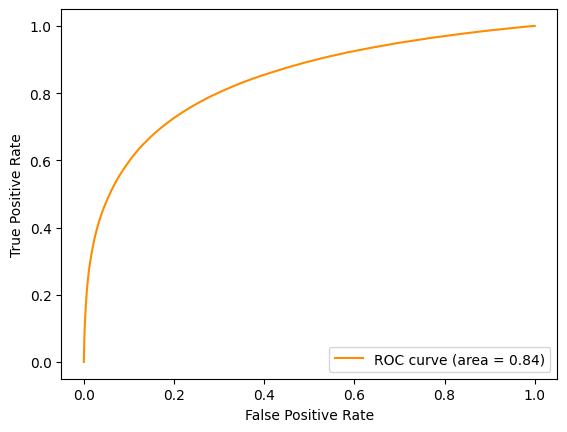

In [45]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [46]:
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score


In [47]:
# the predicted probabilites are stores y_pred_proba

In [48]:
# calculating the evaluation metrics

roc_auc = roc_auc_score(y_Test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_Test, y_pred_proba)
f1 = f1_score(y_Test, y_pred_proba.round())
accuracy = accuracy_score(y_Test, y_pred_proba.round())

In [51]:
data = {
    'Metric': ['ROC AUC', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Max Significance'],
    'Value': [roc_auc, precision, recall, f1, accuracy, max_significance]
}

In [52]:
df = pd.DataFrame(data)
df

,Metric,Value
0,ROC AUC,0.858159
1,Precision,"[0.458233, 0.45823345823345824, 0.458233916467..."
2,Recall,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,F1 Score,0.745908
4,Accuracy,0.788469
5,Max Significance,1132.789263


In [53]:
# Note: I did not understand the question refering to Lab5 for scenarios